In [1]:
!wget https://raw.githubusercontent.com/karencfisher/forward-forward/main/models.py
!wget https://raw.githubusercontent.com/karencfisher/forward-forward/main/layers.py
!wget https://raw.githubusercontent.com/karencfisher/forward-forward/main/utils.py

--2023-02-20 02:02:54--  https://raw.githubusercontent.com/karencfisher/forward-forward/main/models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2961 (2.9K) [text/plain]
Saving to: ‘models.py’

models.py           100%[===================>]   2.89K  --.-KB/s    in 0s      

2023-02-20 02:02:54 (59.9 MB/s) - ‘models.py’ saved [2961/2961]

--2023-02-20 02:02:54--  https://raw.githubusercontent.com/karencfisher/forward-forward/main/layers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1613 (1.6K) [text/plain]
Saving to: ‘la

In [10]:
import matplotlib.pyplot as plt
import random
import numpy as np

from sklearn.metrics import accuracy_score

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Mean
from tensorflow.data import Dataset
import tensorflow as tf


import utils
from layers import FFDense
from models import FFNetwork

11490434/11490434 [==============================] - 0s 0us/step


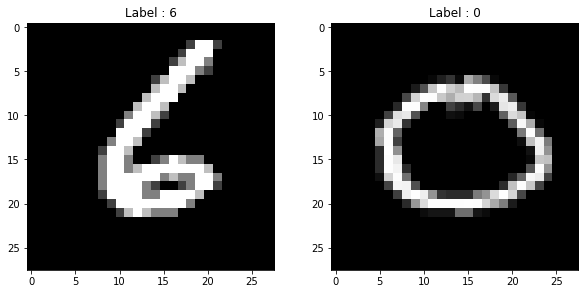

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255
y_train = y_train.astype(int)
y_test = y_test.astype(int)

train_dataset = Dataset.from_tensor_slices((x_train, y_train))
test_dataset = Dataset.from_tensor_slices((x_test, y_test))

train_dataset = train_dataset.batch(60000)
test_dataset = test_dataset.batch(10000)

utils.show_samples(x_train, y_train, 2)

In [4]:
model = FFNetwork([784, 500, 500])

model.compile(
    optimizer=Adam(learning_rate=0.03),
    loss="mse",
    jit_compile=True,
    metrics=[Mean()],
)

In [5]:
history = model.fit(train_dataset, epochs=100, verbose=1)

Epoch 1/100
Training layer 1 now : 
Training layer 2 now : 
Training layer 1 now : 
Training layer 2 now : 
1/1 [==============================] - 83s 83s/step - FinalLoss: 0.7249
Epoch 2/100
1/1 [==============================] - 6s 6s/step - FinalLoss: 0.7085
Epoch 3/100
1/1 [==============================] - 6s 6s/step - FinalLoss: 0.6982
Epoch 4/100
1/1 [==============================] - 6s 6s/step - FinalLoss: 0.6830
Epoch 5/100
1/1 [==============================] - 6s 6s/step - FinalLoss: 0.6649
Epoch 6/100
1/1 [==============================] - 6s 6s/step - FinalLoss: 0.6467
Epoch 7/100
1/1 [==============================] - 6s 6s/step - FinalLoss: 0.6295
Epoch 8/100
1/1 [==============================] - 6s 6s/step - FinalLoss: 0.6137
Epoch 9/100
1/1 [==============================] - 6s 6s/step - FinalLoss: 0.5991
Epoch 10/100
1/1 [==============================] - 6s 6s/step - FinalLoss: 0.5859
Epoch 11/100
1/1 [==============================] - 6s 6s/step - FinalLoss: 0.573

Test Accuracy score : 96.47%


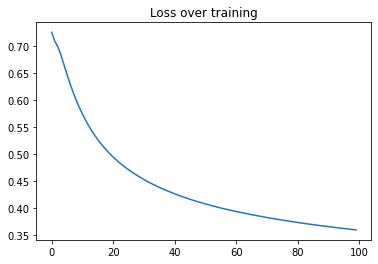

In [12]:
preds = model.predict(tf.convert_to_tensor(x_test))
preds = preds.reshape((preds.shape[0], preds.shape[1]))
results = accuracy_score(preds, y_test)
print(f"Test Accuracy score : {results*100}%")

plt.plot(range(len(history.history["FinalLoss"])), history.history["FinalLoss"])
plt.title("Loss over training")
plt.show()